<a href="https://colab.research.google.com/github/sandhrabijoy/_/blob/master/Weather_Prediction_in_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [4]:
#loading the data
from zipfile import ZipFile
data="https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path=keras.utils.get_file(origin=data,fname="jena_climate_2009_2016.csv.zip")
zipfile=ZipFile(zip_path)
zipfile.extractall()
csv="jena_climate_2009_2016.csv"

df=pd.read_csv(csv)

In [6]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


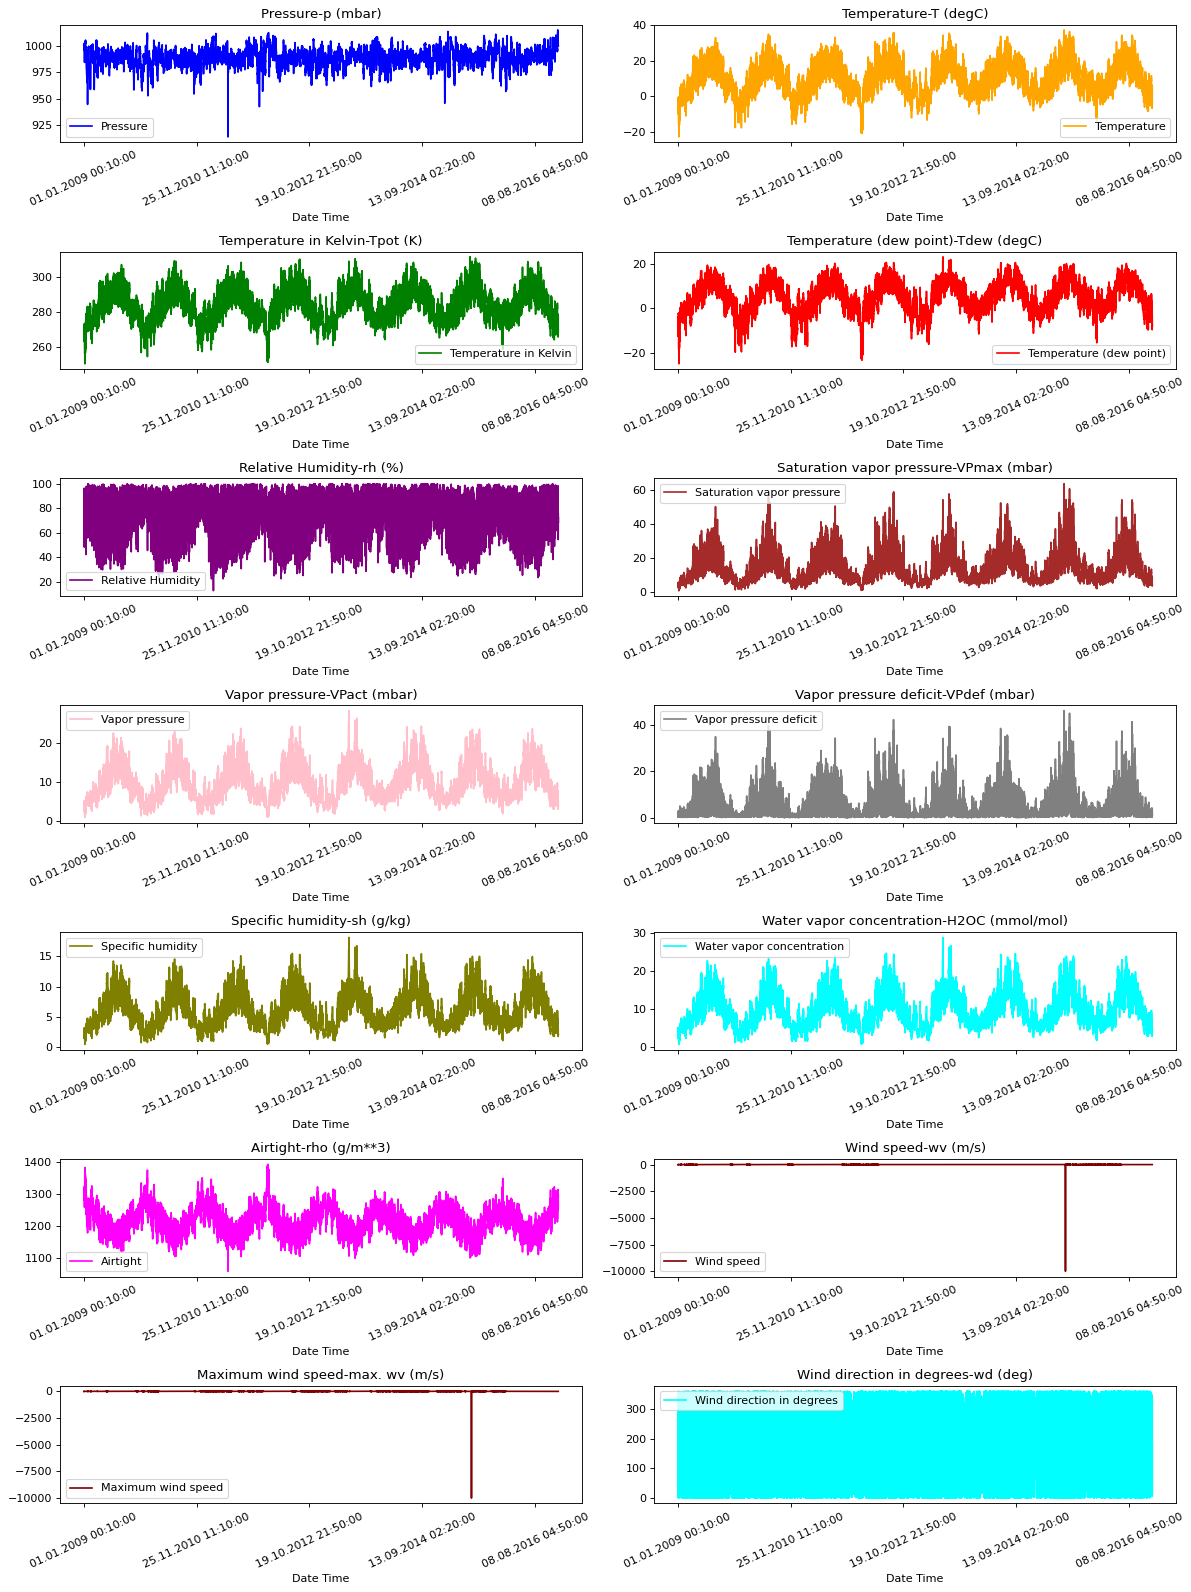

In [8]:
#data visualization
import matplotlib.pyplot as plt
import pandas as pd

titles=["Pressure", "Temperature", "Temperature in Kelvin", "Temperature (dew point)",
    "Relative Humidity", "Saturation vapor pressure", "Vapor pressure",
    "Vapor pressure deficit", "Specific humidity", "Water vapor concentration",
    "Airtight", "Wind speed", "Maximum wind speed", "Wind direction in degrees"]

feature_keys=["p (mbar)", "T (degC)", "Tpot (K)", "Tdew (degC)", "rh (%)",
    "VPmax (mbar)", "VPact (mbar)", "VPdef (mbar)", "sh (g/kg)",
    "H2OC (mmol/mol)", "rho (g/m**3)", "wv (m/s)", "max. wv (m/s)", "wd (deg)",]

colors = [
    "blue", "orange", "green", "red", "purple",
    "brown", "pink", "gray", "olive", "cyan", "magenta","maroon","maroon", "cyan"
]

date_time_key='Date Time'

def plot_single_feature(ax,title,key,color,time_data,data):
  t_data=data[key]
  t_data.index=time_data
  t_data.plot(ax=ax,color=color, title="{}-{}".format(title,key),rot=25)
  ax.legend([title])

def show_raw_visualization(data):
  time_data=data[date_time_key]
  fig,axes=plt.subplots(nrows=7,ncols=2,figsize=(15,20),dpi=80,facecolor='w',edgecolor='k')
  for i,(title,key,color) in enumerate(zip(titles,feature_keys,colors)):
    plot_single_feature(axes[i//2,i%2],title,key,color,time_data,data)
    plt.tight_layout()

show_raw_visualization(df)

In [9]:
 #data preprocessing
import numpy as np

split_fraction=0.715
train_split=int(split_fraction*len(df))
step=6

past=720
future=72
learning_rate=0.001
batch_size=256
epochs=10

def normalize_data(data,train_split):
  data_mean=np.mean(data[:train_split],axis=0)
  data_std=np.std(data[:train_split],axis=0)
  normalized_data=(data-data_mean)/data_std
  return normalized_data

In [10]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32


In [11]:
features=normalize_data(features.values,train_split)
features=pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944


In [12]:
train_data=features.loc[0:train_split-1]
val_data=features.loc[train_split:]

In [13]:
#train the dataset
start=past+future
end=start+train_split

x_train=train_data.iloc[start:end,:7].values
y_train=train_data.iloc[start:end,1].values.reshape(-1,1)

sequence_length=int(past/step)

print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("Sequence length:",sequence_length)

x_train shape: (299901, 7)
y_train shape: (299901, 1)
Sequence length: 120


In [15]:
dataset_train=keras.preprocessing.timeseries_dataset_from_array(x_train,y_train,sequence_length=sequence_length,sampling_rate=step,batch_size=batch_size)

In [17]:
x_end=len(val_data)-past-future

label_start=train_split+past+future

x_val=val_data.iloc[:x_end][[i for i in range(7)]].values
y_val=features.iloc[label_start:][[1]]

dataset_val=keras.preprocessing.timeseries_dataset_from_array(x_val,y_val,sequence_length=sequence_length,sampling_rate=step,batch_size=batch_size)

for batch in dataset_train.take(1):
  inputs,targets=batch

print("Input shape:",inputs.numpy().shape)
print("Target shape:",targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)
